# 1 Introduction to Raster Images
This is the first part of a series on how to read raster images from files,
manipulate them, display the result in a Jupyter notebook and save it to a file.

A raster image is represented as a rectangular grid of coloured dots,
whereas a vector image is represented as a collection of lines.
In the following, image means a raster image.

There are many file formats for storing images,
like BMP, GIF, TIFF, PNG and JPEG.
Some of them compress the image to reduce the size of the file.

## 1.1 Representing images
A computer screen is a grid of tiny dots, called pixels
(short for picture elements).
Raster images, e.g. photos, can be represented as a matrix of numbers,
each number representing the colour of the corresponding pixel.
The height and width of the image is the number of rows and columns
of the matrix.

If each number consists of _n_ bits, then the image can use up to
$2^n$ different colours. For example, images with 1 bit per pixel
can only have $2^1$ = 2 colours, usually black and white.
Many greyscale images use 8 bits per pixel, for $2^8$ = 256 levels of grey,
from black (represented as zero) to white (represented as 255).
Many colour images use 24 bits per pixel, for a staggering
$2^{24}$ = 16,777,216 possible colours.

In practice, instead of a single number, colour images use
several channels per pixel, each channel representing one property of the pixel.

The most common scheme is RGB, with three channels for red, green and blue.
Each pixel is represented by a triple of 8-bit numbers (from 0 to 255)
that indicate the intensity of red, green and blue light for each pixel.
Darkness is the absence of light, so black is represented by triple (0, 0, 0),
while white light has all colours, so it's represented by (255, 255, 255).
Grey colours are represented by other 3 equal numbers.

In Python, we can represent an RGB image as a matrix (a list of lists)
of pixels, each pixel represented by a list of three integers from 0 to 255.

In [1]:
BLUE = [  0,   0, 255]      # RGB triple for blue (no red or green)
GREY = [200, 200, 200]      # 3 equal values for any grey colour

cross = [                   # 3 x 5 image of blue cross on grey background
    [GREY, GREY, GREY],     # row 0
    [GREY, BLUE, GREY],     # row 1
    [BLUE, BLUE, BLUE],     # row 2
    [GREY, BLUE, GREY],     # row 3
    [GREY, GREY, GREY]      # row 4
]

We can use the [matplotlib](https://matplotlib.org) library
to display the matrix as an image in the notebook.

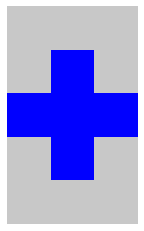

In [2]:
import matplotlib.pyplot as plt
plt.axis('off')     # don't show the x and y axes
plt.imshow(cross)

Matplotlib automatically enlarges or reduces an image so that it fits within
a reasonably sized bounding box. Here, the tiny image was enlarged.

**Exercise**:
Modify the definition of `GREY` to get a darker grey background.
Run both code cells above to check the result.

Having the image stored in a matrix allows us to modify it as we please.

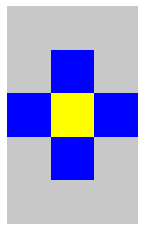

In [3]:
cross[2][1] = [255, 255, 0]     # red + green light = yellow light
plt.axis('off')
plt.imshow(cross)

**Exercise**:
Change a different pixel (of the cross or of the background)
to a different colour.

## 1.2 The raster image library
I've written [raster.py](raster.py), a very small library with five functions:

- `load(filename)` returns an image from the given file, as a matrix of pixels
- `save(image, filename)` saves the image to the given file
- `show(image)` displays the image in the notebook
- `width(image)` returns the number of columns (horizontal number of pixels)
- `height(image)` returns the number of rows (vertical number of pixels).

The given file names must include an extension, so that the `load` and `save`
functions know in which format the image is stored.

The constants `R`, `G` and `B` provide access to each channel of a pixel in
a more readable way than 0, 1 and 2, e.g.
`image[0][0][G]` is the green channel value of the top left pixel
while `image[-1][-1][B]` is the blue channel value of the bottom right pixel.

Finally, the library includes constants for the 16
[basic colours in HTML 4](https://en.wikipedia.org/wiki/Web_colors#Basic_colors):
`FUCHSIA`, `MAROON`, etc.

Let's see how to use the library. First we must load it into the notebook.

In [4]:
from raster import *

Now we can load and display any image with `load` and `show`.

256 by 256 pixels


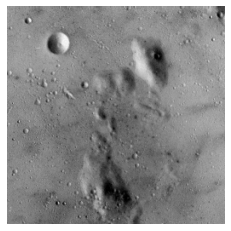

In [5]:
moon = load('moon.tiff')    # image in same folder as this notebook
print(width(moon), 'by', height(moon), 'pixels')
show(moon)

(_Source: [USC-SIPI Image Database](http://sipi.usc.edu/database/),
Miscellaneous volume, image 5.1.09_)

In a greyscale image, all pixels have the same red, green and blue values.

In [6]:
moon[3][:5]     # left-most 5 pixels in the 4th row

[[160, 160, 160],
 [158, 158, 158],
 [148, 148, 148],
 [144, 144, 144],
 [140, 140, 140]]

To manipulate an image, we go through the matrix, row by row, column by column,
and change each pixel. Here's a silly example. It divides the 256 greyscale
values into three 'bands' and replaces dark pixels by blue pixels,
light pixels by silver pixels, and the rest by teal pixels.

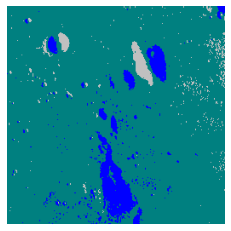

In [7]:
for row in range(height(moon)):
    for column in range(width(moon)):
        pixel = moon[row][column]
        if pixel[R] < 85:
            moon[row][column] = BLUE
        elif pixel[R] < 170:
            moon[row][column] = TEAL
        else:
            moon[row][column] = SILVER
show(moon)

**Exercise**: Experiment with other colours and with fewer or more bands.
You can change the code so that it searches for and shows only certain pixels,
e.g. all pixels that don't have grey level 128 become white.

Finally, we can save the resulting image in the same or a different format.

In [8]:
save(moon, 'funky-moon.png')    # save to PNG format

Saving an image to a file overwrites that file, if it exists.

As a second example, let's convert an image from PNG to BMP format.

In [9]:
save(load('funky-moon.png'), 'funky-moon.bmp')

That's all there is to it!
To check the conversion, we display the resulting file.

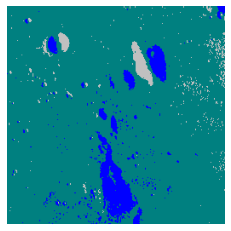

In [10]:
show(load('funky-moon.bmp'))

The `show` function can have a second parameter: a float indicating
by how much the display should be enlarged or reduced.

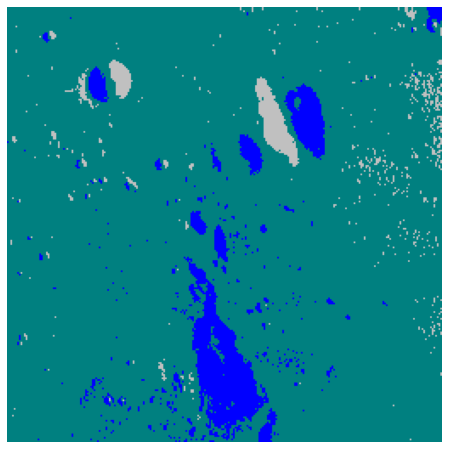

In [11]:
show(load('funky-moon.png'), 2)     # double the display's width and height

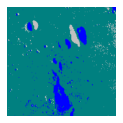

In [12]:
show(load('funky-moon.png'), 0.5)   # halve the display's width and height

Only the display size changes: the image itself keeps its width and height.

You can use Python's `help` function to get a description of each function.

In [13]:
help(load)

Help on function load in module raster:

load(filename: str) -> List[List[List[int]]]
    Load the given file and return the image.
    
    The file must exist and be in any of the formats read by PIL:
    https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html
    
    The returned image is a matrix of pixels.
    The matrix is a list of rows, from the image's top to bottom,
    with each row a list of pixels, from left to right.
    All rows have the same length.
    Each pixel is a list of three integers from 0 to 255 (inclusive),
    representing the red-green-blue components of the pixel.



The `load` and `save` functions use the powerful
[Python Image Library](https://pillow.readthedocs.io/en/stable/) (PIL) to do
all the hard work of reading and writing the various file formats.

The [next part](2-puzzles.ipynb) of this series has exercises about
concealed images.